# XGBoost (eXtreme Gradient Boost) in Python

In this discussion, we use ***XGBoost (eXtreme Gradient Boosts)*** to build a collection of 
boosted trees, and use continuous and categorical data from Kaggle.com
(Original dataset was provided by IBM) to predict whether or not a customer will stop 
using a company's service. 

You can download the Telco Customer Churn Dataset Telco-Customer-Churn.csv

from many web-sites:
    
https://github.com/IBM/telco-customer-churn-on-icp4d/tree/master/data

The entire data is 235 MB. It will take 30 minutes to download the data.
    
The Telco customer churn data contains information about a fictional telco company that provided home phone 
and Internet services to 7043 customers in California in Q3. 

It indicates which customers have left, stayed, or signed up for their service. 

Multiple important demographics are included for each customer, as well as a 
Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

We can download similar dataset from GitHub or Kaggle. Dataset may not as complete as IBM.

https://github.com/IBM/telco-customer-churn-on-icp4d/tree/master/data


***XGBoost*** is an exceptionally useful machine learning method when you do not want 
to sacrifice the ability to classify observations but you still want a model is 
fairly easy to understand and interpret.


We discuss the following:
- import data
- missing data
    - Identify missing data
    - Deal with missing data
- Format data for XGBoost
    - Split Data into Dependent and Independent Variables
    - One-Hot-Encoding
    - Convert all columns to int, Float, or Bool
- Build a Preliminary XGBoost Model
- OPtimize Parameter with Cross Validation and GridSearch()
    - Optimize the learning rate, tree depth, number of trees, gamma (for pruning), and Lambda (for Regularization).
    - Build, Draw, Interpret, and Evaluate the Optimized XGBoost Model

## Note:

The following knowledge are required:

- XGBoost
- Cross Validation
- Confusion Matrices.

# Import Python Packages

- Anaconda 3
- Pyhton 3
- Pandas
- numpy
- sklearn
- xgboost

Some commands under anancodna:
- conda activate <tensorflow>
- conda list
- pip install scikit-learn
- pip install xgboost    # install XGBoost packages
- conda install graphviz python-graphviz  # draw graph with tree

In [2]:
import pandas as pd   # Manipulate data and One-Hot Encoding
import numpy as np    # Calculate Mean and Standard Deviaiton
import xgboost as xgb # XGBoost Algrotihms 
from sklearn.model_selection import train_test_split # split data into train/test
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # score
from sklearn.model_selection import GridSearchCV # Cross Validation
from sklearn.metrics import confusion_matrix # Confusion Matrix
from sklearn.metrics import plot_confusion_matrix # draw confusion Matrix

# Import Data

We load the Telco Churn Dataset.
This dataset allow us to predict if someone will stop using the Telco's Services or 
not using a variety of continuous and categorical datatypes. 

In [41]:
# Import Data

# we use panda to load the data into the data frame.
#df = pd.read_csv ('../csv_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv ('../csv_data/Telco-Customer-Churn.csv')

In [29]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# Drop Some Columns if needed

For the some dataset (IBM dataset), those columns, such as, 
"Churn Label", "Churn Score", "CLTV", "Churn Reason", and etc. are there.

These data are exit interview data. Onlt the Telco employee eixt Telco are provied here.  
Those are specific for Teclo company only. We do not use here for prediction. 
We remove them and still get the prefect prediction.

In this dataset, we already removed "Churn Label", "Churn Score", "CLTV", "Churn Reason".

The following commands are used to drop those columns.

In [15]:
#df.drop(["Churn Label", "Churn Score", "CLTV", "Churn Reason"], 
#       axis=1, inplace=True) # aixs = 0 to remove row, axis = 1 to remove columns
#df.head()

# Drop data: Count, Country, State
Some of the other columns only contain a single value, and will not be useful for classification.
For example, "Count" are all "1", "Country" are all "United State", "state" are all "California"
in Original IBM dataset contains these are removed in the new dataset.
We do not have to remove again.

In [19]:
#df['Count'].unique()
#df['Country'].unique()
#df['State'].unique()
#df['City'].unique()
# Latitude or Longiture
#df['Lat Long'].unique()
#df.drop(["Count", "COuntry", "State", "City", 'customerID', "Lat long"], 
#       axis=1, inplace=True) # aixs = 0 to remove row, axis = 1 to remove columns

In [27]:
#df['customerID'].unique()
df.drop(['customerID'], 
      axis=1, inplace=True) # aixs = 0 to remove row, axis = 1 to remove columns
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
# Missing Data Part 1: Identify Mssing Data

Missing Data is a blank space, or surrogaye (replace) value, like NA, that indicates that we failed to collect data 
for one of the features.  

In [28]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

a lot of columns are object, and that is OK. 

In [29]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

So, PhoneService has type object because it contains text, and it only contains two values, Yes and No.
So this is good.
Now, in practice, we can check every other columns. Right now, we check another column "TotalCharge"

TotalCharge are numbers.

In [30]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

...we see too many values to print and what title we see looks like numbers. 
However, if we try to convert the column to numeric values...

In [5]:
# Convert column to numeric value
df['Total Charges'] = pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [ ]:
...we get an error. This error, we try to convert a ' ' (blank) to numeric.
We need to deal with the " " (blank).

# Missing Data: Deal with Missing Data for XGBoost
We need to fix all " " (blank) and set them into 0.

Before we do that, let's how many rows are missing data.

If there are a lot, then we might have to fix them before use XGBoost.

We see TotalCharges has 11 rows of missing data.
We can set the 11 Total change to 0.

In [31]:
# This is the 11 rows of data.
# We use loc to get 11 rows out of data frame.
# Scroll to the end to see blank (' ') data there.
df.loc[df['TotalCharges'] == ' ']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [32]:
# Use len() to count how many rows has ' '
len(df.loc[df['TotalCharges'] == ' '])

11

In [33]:
# Fix the TotalCharge = ' ' into TotalCharge = 0.
# Set TotalCharg columns to 0.
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = 0

In [34]:
len(df.loc[df['TotalCharges'] == ' '])

0

In [35]:
# Display the 'TotalCharges' == ' '. Now we fix it.
df.loc[df['TotalCharges'] == ' ']

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [9]:
# Tenure: Meaning credit card holding for a period.
# When total charge = 0, the tensure months should be 0.
# There are 11 tensure = 0.
df.loc[df['tenure'] == 0]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

In [36]:
# Verify the Tenure = 0 also 11 rows.
len (df.loc[df['tenure'] == 0])

11

In [46]:
# Now, we can conver the 'TotalCharge' from string into numeric.
# to_numeric() is a pandas function,s
# Fix the TotalCharge = ' ' into TotalCharge = 0.
# Set TotalCharg columns to 0.
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
print("df['Churn'].head():")
print(df['Churn'].head())
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("df['Churn'].head():")
print(df['Churn'].head())
df.dtypes

df['Churn'].head():
0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object
df['Churn'].head():
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Now, we convert the TotalCharges from Object into float.

...and we have fixed the missing data. We can replace all other white-spaces in 
all of the columns with underscores.

## Note:

We do this, so we can draw a picture of the one of the ***XGBoost*** trees.

In [18]:
df.replace(' ', '_', regex=True, inplace=True)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No_phone_service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No_phone_service             DSL            Yes  ...              Yes   
4                No     Fiber_optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One_year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One_year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic_check          29.85         29.85      0  
1               Mailed_check          56.95       1889.50      0  
2               Mailed_check          53.85        108.15      1  
3  Bank_transfer_(automatic)          42.30       1840.75      0  
4           Electronic_check          70.70        151.65      1  

[5 rows x 21 columns]

# Format Data: Split into Dependent and Independent Variables

We have fixed the missing data.

Now, we format data for XGBoost model.

The first step is to split data into two parts:
1. The features data (X): we want to make classification. 
2. The target/label data (y): we want to predict. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

By default, pandas use deep copy by default df.copy(deep=True). New separate object and data value.

The code below is a deep copy. It has separate copy of object reference and data value.

When we df.copy (deep = False), pandas generate a new reference but share the same data.

Modify X will not affect the original data frame.

When we use copy.deepcopy() in Standard Library, it is copy by value (data in different memory address).

Using copy() ensures the original data df_no_missing is not modified when we modify X or y. 

In other words, if we make mistake when we are formatting the columns for classification trees, 
we can just re-copy df_no_missing, rather than have to reloaded the original data and remove the missing values.

In [76]:
X = df.drop('Churn', axis=1).copy() 
# data frame deep copy [default copy (deep = True).
# We copy totally two different copies of data and reference.
# Modify X will not affeact the df.
# alternatively: X = df_no_missing,iloc[:, :-1]
X.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No_phone_service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No_phone_service             DSL            Yes           No   
4                No     Fiber_optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One_year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One_year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes           Electronic_check           29.85         29.85  
1               No               Mailed_check           56.95       1889.50  
2              Yes               Mailed_check           53.85        108.15  
3               No  Bank_transfer_(automatic)           42.30       1840.75  
4              Yes           Electronic_check           70.70        151.65

In [71]:
y = df['Churn'].copy()
# Deep copy with totally different memory address and separate data value.
# Modify y will not affeact the df.
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Format Data: One-Hot Encoding

We have split the data in X and y.

Now, we have to to do the one-hot-encoding.
(26:28/56:42)
- City: Category
    - Los Angeles, Beverly Hills, etc.
- Zip Code: Category
    - 90003, 95127
- Latitude: Float
- Longitude: Float

Our dataset start from here:
- Gender: Category
    - Female, Male
- Senior Citizen: Category
    - Yes, No
- Partner: Category
    - Yes, No
- Dependents: Category
    - Yes, No
- Tenure Months: Float
- Phone Service: Category
    - Yes, No 
- Multiple Lines: Category
    - Yes, No -> No_phone_service, No,
- Internet Service: Category
    - No, DSL, Fiber optic
- Online Security: Category
    - Yes, No
- Online Backup: Category
    - Yes, No
- Device Protection: Category
    - Yes, No
- Tech Support: Category
    - Yes, No
- Streaming TV: Category
    - Yes, No
- Streaming Movies: Category
    - Yes, No
- Contract: Category
    - Mono-t-month, One Year, Two Year
- Paperless Billing: Category
    - Yes, No
- Payment Method: Category
    - Mailed check, Electronic Check, Bank Transfer (Automatic)
- Monthly Charges: Float
- Total Charges: Float
    
Now, just to review. Let's look at the data type in X.

In [72]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

The type float are all correct.

However, the object type, we need to convert into Category by ***One-Hot Encoding***.

Machine Learning algorithm only recognize the One-Hot Encoding.

For example. Payment Method:

We have 
1. Mailed_check
2. Electronic_check.
3. Bank_Transfer
4. Credit_card

We need to convert them into categories numbers, 1, 2, 3, 4, treated them like continuous data so that 
XGBoost can use.

## Note:

There are many different ways to do One-Hot Encoding in Python.
Two most popular methods are:

1. ColumnTransformer(): from scikit-learn
2. get_dummies(): from pandas

Both method gave pros and cons.

ColumnTransformer() have good features where it create a persistent function that can validate data in future.
If you build your XGBoost model using a categorical variables, favorite color, that have red, blue, green options, 
then ColumnTransformer() is a good choice.

We use get_dummies() is easy and we use here.

In [79]:
pd.get_dummies (X, columns=['PaymentMethod']).head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No_phone_service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No_phone_service             DSL            Yes           No  ...   
4                No     Fiber_optic             No           No  ...   

  StreamingTV StreamingMovies        Contract PaperlessBilling MonthlyCharges  \
0          No              No  Month-to-month              Yes          29.85   
1          No              No        One_year               No          56.95   
2          No              No  Month-to-month              Yes          53.85   
3          No              No        One_year               No          42.30   
4          No              No  Month-to-month              Yes          70.70   

  TotalCharges  PaymentMethod_Bank_transfer_(automatic)  \
0        29.85                                        0   
1      1889.50                                        0   
2       108.15                                        0   
3      1840.75                                        1   
4       151.65                                        0   

   PaymentMethod_Credit_card_(automatic)  PaymentMethod_Electronic_check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed_check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 22 columns]

As we can see, PaymentMethod_... works well for one-hot Encoding,

# Convert all of Categories by One-Hot Encoding

In [21]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
X = df.drop('Churn', axis=1).copy() 
y = df['Churn'].copy()
X_encoded = pd.get_dummies (X, columns= ['gender',
                                        'SeniorCitizen',
                                        'Partner',
                                        'Dependents',
                                        'PhoneService',
                                        'MultipleLines',
                                        'InternetService',
                                        'OnlineSecurity',
                                        'OnlineBackup',
                                        'DeviceProtection',
                                        'TechSupport',
                                        'StreamingTV',
                                        'StreamingMovies',
                                        'Contract',
                                        'PaperlessBilling',
                                        'PaymentMethod'])

In [22]:
X_encoded.head()

customerID  tenure  MonthlyCharges  TotalCharges  gender_Female  \
0  7590-VHVEG       1           29.85         29.85              1   
1  5575-GNVDE      34           56.95       1889.50              0   
2  3668-QPYBK       2           53.85        108.15              0   
3  7795-CFOCW      45           42.30       1840.75              0   
4  9237-HQITU       2           70.70        151.65              1   

   gender_Male  SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  \
0            0                1                0           0            1   
1            1                1                0           1            0   
2            1                1                0           1            0   
3            1                1                0           1            0   
4            0                1                0           1            0   

   ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One_year  \
0  ...                    0                        1                  0   
1  ...                    0                        0                  1   
2  ...                    0                        1                  0   
3  ...                    0                        0                  1   
4  ...                    0                        1                  0   

   Contract_Two_year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank_transfer_(automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit_card_(automatic)  PaymentMethod_Electronic_check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed_check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 47 columns]

In [70]:
df = pd.read_csv ('../csv_data/Telco-Customer-Churn.csv')
df.drop(['customerID'], 
      axis=1, inplace=True) # aixs = 0 to remove row, axis = 1 to remove columns
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
#print("df['churn'].head():", )
#print(df['Churn'].head())
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
X = df.drop('Churn', axis=1).copy() 
y = df['Churn'].copy()
X_encoded = pd.get_dummies (X, columns= ['gender',
                                        'SeniorCitizen',
                                        'Partner',
                                        'Dependents',
                                        'PhoneService',
                                        'MultipleLines',
                                        'InternetService',
                                        'OnlineSecurity',
                                        'OnlineBackup',
                                        'DeviceProtection',
                                        'TechSupport',
                                        'StreamingTV',
                                        'StreamingMovies',
                                        'Contract',
                                        'PaperlessBilling',
                                        'PaymentMethod'])
y.unique()
print('X_encoded.head():')
print(X_encoded.head())
print('y.head():')
print(y.head())

X_encoded.head():
   tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85              1            0   
1      34           56.95       1889.50              0            1   
2       2           53.85        108.15              0            1   
3      45           42.30       1840.75              0            1   
4       2           70.70        151.65              1            0   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  Dependents_No  \
0                1                0           0            1              1   
1                1                0           1            0              1   
2                1                0           1            0              1   
3                1                0           1            0              1   
4                1                0           1            0              1   

   ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0  ..

# Build a Preliminary XGBoost Model

We already clean up the Missing Data and One-Hot Encoding. We are ready to build XGBoost Model.

First, we need to split the data into training and testing set and then build the XGBoost Mode.

However, we first observe how many customer left the Telco Company.

In [55]:
# Check how meny customer left Teclo
print('sum(y):', sum(y))
print('len(y):', len(y))
print ('sum(y)/len(y):', sum(y)/len(y))

sum(y): 1869
len(y): 7043
sum(y)/len(y): 0.2653698707936959


# Split Training/Test Dataset with y as the label
So, we see 27% customer left the Telco service. 
We use y as the stratify (classify) label.

In [71]:
# random_satte=42, seed for seam result all the time.
# Stratify = y used y as the label for classify (stratify)
X_train, X_test, y_train, y_test = train_test_split (X_encoded, y, random_state=42, stratify=y)
print ('sum(y_train)/len(y_train):', sum(y_train)/len(y_train))
print ('sum(y_test)/len(y_test):', sum(y_test)/len(y_test))

sum(y_train)/len(y_train): 0.2654297614539947
sum(y_test)/len(y_test): 0.26519023282226006


## Note:

Instead of determining the optimal number of trees with Cross Validation.

We use ***early stopping*** to stop building trees when they no longer improve the situation.

In [81]:
df = pd.read_csv ('../csv_data/Telco-Customer-Churn.csv')
df.drop(['customerID'], 
      axis=1, inplace=True) # aixs = 0 to remove row, axis = 1 to remove columns
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
#print("df['churn'].head():", )
#print(df['Churn'].head())
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
X = df.drop('Churn', axis=1).copy() 
y = df['Churn'].copy()
X_encoded = pd.get_dummies (X, columns= ['gender',
                                        'SeniorCitizen',
                                        'Partner',
                                        'Dependents',
                                        'PhoneService',
                                        'MultipleLines',
                                        'InternetService',
                                        'OnlineSecurity',
                                        'OnlineBackup',
                                        'DeviceProtection',
                                        'TechSupport',
                                        'StreamingTV',
                                        'StreamingMovies',
                                        'Contract',
                                        'PaperlessBilling',
                                        'PaymentMethod'])

X_train, X_test, y_train, y_test = train_test_split (X_encoded, y, random_state=42, stratify=y)
clf_xgb = xgb.XGBClassifier (objective='binary:logistic', 
                             use_label_encoder=False, 
                             missing=None, seed=42)
print('XGBoost fit:')
clf_xgb.fit(X_train, y_train, verbose=True,            
            early_stopping_rounds=10, 
            eval_metric='aucpr', 
            eval_set=[(X_test, y_test)])

XGBoost fit:
[0]	validation_0-aucpr:0.63160
[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64429
[4]	validation_0-aucpr:0.63866
[5]	validation_0-aucpr:0.63419
[6]	validation_0-aucpr:0.63912
[7]	validation_0-aucpr:0.63787
[8]	validation_0-aucpr:0.63779
[9]	validation_0-aucpr:0.63894
[10]	validation_0-aucpr:0.63680
[11]	validation_0-aucpr:0.63828


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Plot Confusion Matrix:

We have built an ***XGBoost*** model for classification.

Let's see how it performs on the ***Testing Dataset*** by running the ***Testing Dataset*** down 
the model and drawing a ***Confusion Matrix***.

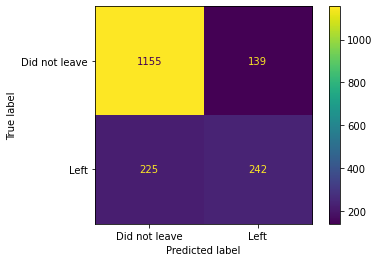

In [84]:
plot_confusion_matrix (clf_xgb, X_test, y_test, values_format='d', 
                       display_labels=["Did not leave", "Left"])

In the confusion matrix, we see ***1294 (= 1155 + 139) customer did not leave. 1155 (89%)*** 
are correctly classified.

And of the 467 (= 255+ 242) customer that left Telco Company. 242 (52%)*** are correctly classified.

So the XGBoost model is not good. Part of the reason is our data is imbalanced.

The leaving customer cost company a lot of money, we would like to capture more of the customer 
that left.

The good news is ***XGBoost*** the parameter, scale_pos_weight, that helps with imbalanced data.

It add the penalty for incorrectly classifying, the minority class. In this case, the customer that left the company. We want to increase the penalty so that the trees will try harder to correct the classify them. 

Let's try to improve predictions using ***Cross Validations*** to optimize the parameters


# Optimize Parameters by Cross Validation and GridSearch()

XGBoost has a lot of Hyperparameters, Parameters that we have to manual configure and not determined 
by XGBoost itself, including:

- max_depth, the maximum tree depth, 
- learning_rate, the learning rate, or "eta", 
- gamma, the parameter that encourage pruning, and 
- reg_lambda, the regularization parameter lambda.

So, let's try to to find the optimal values for these hyperparameters to optimize, we will use GridSearch().

We specify a bunch of potential values for the hyperparameters and GridSearchCV() tests 
all possible combinations of the parameters for us.

In [118]:
# Note: 
# When the data are imbalanced, we need manual test by XGBoost.
# If we care about the overall perforamcebn metrtc (AUC, area under cusrve) of prediction:
#  1) Balance of the positive and negative weight via scale_pos_weight
#  3) Use AUC for evaluation.
# Use GraidSeacgCV() sequentially on subsets of parameter options, rather than in order to 
# optimize parametess in a short period of time.

# Round 1:
# https://xgboost.readthedocs.io/en/latest/parameter.html
# XGBoosts default scale_pos_weight = sum(negative instance)/sum(positve instance) = 1
#param_grid = {
#    'max_depth': [3, 4, 5],
#    'learning_rate': [0.1, 0.01, 0.5],
#    'gamma': [0, 0.25, 1.0],
#    'reg_lambda': [0, 1.0, 10.0],
#    'scale_pos_weight': [1, 3, 5]
#}

#print('run 1: param_grid:', param_grid)
# Output: max_depth: 4, learnibg_rate: 0.1, gama: 0.25, reg_lamba: 10,scale_pos_weight: 3
# Need to explore more for optimizaiton at round 2. With higher learning ratye = 0.1.

# Round 2
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [0.25],
    'reg_lambda': [10.0, 20, 100],
    'scale_pos_weight': [3]
}
# Ouput: max_depth: 4, learning_rate: 0.1, reg_lamba: 10, scale_pos_weight: 3
print('run 2: param_grid:', param_grid)

# Note:
# In order to speed up the Cross validation, and prevent future overfitting,
# We only use a randon subset of teh data (90%) and 
# We are only use a random subset of the features (columns) (50%) per tree.
# scoring='roc_auc': see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring 
# verbose= 0, If you wan to see what Grid searhc is doing, set Verbose=2
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier (objective='binary:logistic', 
                                seed=42, 
                                use_label_encoder=False, 
                                subsample=0.9, 
                                colsample_bytree=0.5),
    param_grid = param_grid,
    scoring='roc_auc',  
    verbose= 2,
    n_jobs=10,
    cv=3
)

print('oprimal_params:', oprimal_params)

optimal_params.fit(X_train, 
                   y_train,
                   early_stopping_rounds=10, 
                   eval_metric='auc', 
                   eval_set=[(X_test, y_test)],
                   verbose=False)
print(optimal_params.best_params_)

run 2: param_grid: {'max_depth': [4], 'learning_rate': [0.1, 0.5, 1], 'gamma': [0.25], 'reg_lambda': [10.0, 20, 100], 'scale_pos_weight': [3]}
oprimal_params: GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_a

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  22 out of  27 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=10)]: Done  27 out of  27 | elapsed:    4.5s finished


{'gamma': 0.25, 'learning_rate': 0.5, 'max_depth': 4, 'reg_lambda': 100, 'scale_pos_weight': 3}


In [ ]:
Finally, we got the optimal parameter values
gamma = 0.25, lerning_rate=0.5, max_depth=4, and reg_lambda=100, scale_pos_weight=3.

# Build the Optimal XGBoost Model
We build the final XGBoost Model and plug in the optimal parameters from above.

In [123]:
clf_xgb = xgb.XGBClassifier (seed= 42,
                             objective='binary:logistic',
                             use_label_encoder=False,
                             gamma= 0.25,
                             learn_rate= 0.5,
                             max_depth=4,
                             reg_lambda=100, 
                             scale_pos_weigth=3, 
                             subsample=0.9, colsample_bytree=0.5)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10,
           eval_metric='aucpr', eval_set=[(X_test, y_test)])

[13:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learn_rate, scale_pos_weigth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.58259
[1]	validation_0-aucpr:0.58578
[2]	validation_0-aucpr:0.60040
[3]	validation_0-aucpr:0.60392
[4]	validation_0-aucpr:0.60586
[5]	validation_0-aucpr:0.61017
[6]	validation_0-aucpr:0.61818
[7]	validation_0-aucpr:0.61413
[8]	validation_0-aucpr:0.61738
[9]	validation_0-aucpr:0.62557
[10]	validation_0-aucpr:0.63414
[11]	validation_0-aucpr:0.63528
[12]	validation_0-aucpr:0.63454
[13]	validation_0-aucpr:0.63376
[14]	validation_0-aucpr:0.63406
[15]	validation_0-aucpr:0.63179
[16]	validation_0-aucpr:0.62944
[17]	validation_0-aucpr:0.63681
[18]	validation_0-aucpr:0.63

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.5, learning_rate=0.300000012, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=100,
              scale_pos_weight=1, scale_pos_weigth=3, seed=42, subsample=0.9,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

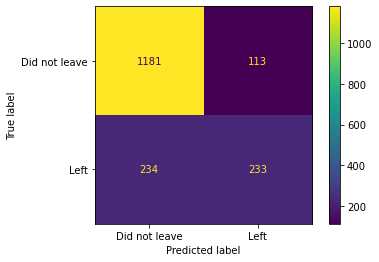

In [120]:
plot_confusion_matrix (clf_xgb, X_test, y_test, values_format='d', 
                       display_labels=["Did not leave", "Left"])

In the confusion matrix, we see ***1294 (= 1181 + 113) customer did not leave. 1181 (91%)*** 
are correctly classified.

And of the 467 (= 254 + 233) customer that left Telco Company. 233 (50%)*** are correctly classified.

# Draw the XGBoost Tree
This is the last thing we are going to do.

[14:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learn_rate, scale_pos_weigth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.58259
weight: {'Contract_Month-to-month': 1, 'InternetService_Fiber optic': 1, 'tenure': 2, 'OnlineSecurity_No': 2, 'PaymentMethod_Electronic check': 1}
gain: {'Contract_Month-to-month': 410.449951, 'InternetService_Fiber optic': 139.967331, 'tenure': 48.4572296, 'OnlineSecurity_No': 4.2632691849999995, 'PaymentMethod_Electronic check': 2.94486809}
cover: {'Contract_Month-to-month': 1193.25, 'InternetService_Fiber optic': 657.25, 'tenure': 328.625, 'OnlineSecurity_No': 116.375, 'PaymentMethod_Electronic check': 186.25}
total_gain: {'Contract_Month-to-month': 410.

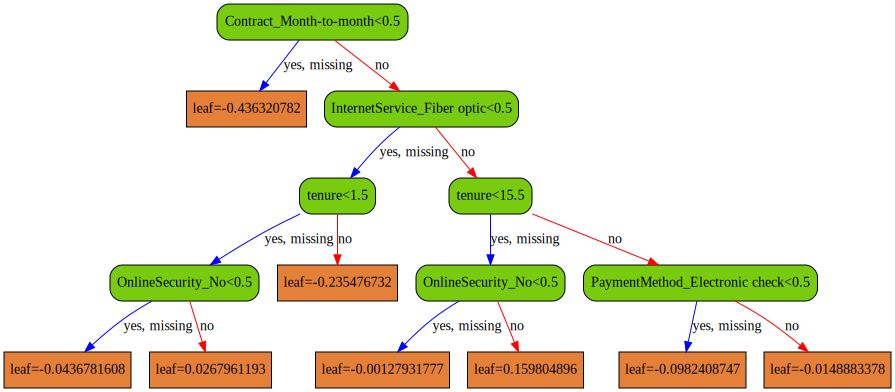

In [135]:
clf_xgb = xgb.XGBClassifier (seed= 42,
                             objective='binary:logistic',
                             use_label_encoder=False,
                             gamma= 0.25,
                             learn_rate= 0.5,
                             max_depth=4,
                             reg_lambda=100, 
                             scale_pos_weigth=3, 
                             subsample=0.9, colsample_bytree=0.5,
# Set n_estimator = 1 to get gain and Cover. 
# Just to draw first tree only instead of many trees (e.g., 55 trees)
                             n_estimators=1) 

clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10,
           eval_metric='aucpr', eval_set=[(X_test, y_test)])

# Now print outht ehweightm gain, and cover, etc. for the tree.
# weight = number of times a feature is used in beacnh or root across all trees.
# gain = the average gain across all splits that the feature is used in.
# cover = the average coverage across all splits a feature is used in
# total_gain = the total gain across all splits the feature is used in,
# toral_cover = the toral coverage across all splits the feature is used in,
# Note:
# Since we only build one treem gain = toral_gain and ocer=total_cover
bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s:' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
              'style': 'filled, rounded',
              'fillcolor': '#78cbe'}
leaf_params= {'shape': 'box',
             'style': 'filled',
             'fillcolor': '#e48038'}
# Note:
# num_trees: specific tree number we wa to plot.
# The default value is 0.
xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10", 
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

# sabve the figure.
#graph_data = xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10", 
#               condition_node_params=node_params,
#               leaf_node_params=leaf_params)
#graph_data.view(filename='xgbbost_trre_customer_churn')